# Primetrade.ai – Trader Behavior vs Market Sentiment
# Candidate: Adarsh Giri


#Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For statistical analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler

#Load Datasets

In [3]:
# Load trader data
trader_df = pd.read_csv("/content/drive/MyDrive/ds_adarsh_giri/csv_files/historical_data.csv")

# Load fear-greed index
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_adarsh_giri/csv_files/fear_greed_index.csv")

In [4]:
# to get five columns from trader datsset
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# to get five columns from sentiment datsset
sentiment_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# Data Cleaning & Preprocessing

Trader dataset

In [6]:
# to get shape of the trader dataset
print("Trader Data Shape:\n", trader_df.shape)

# to get information of the trader dataset
print("\nInfromation of dataset:-\n",trader_df.info())

# to get if null values in trader dataset
print("\nNull values:-\n",trader_df.isnull().sum())

Trader Data Shape:
 (211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  

Sentiment dataset

In [7]:
# to get shape of the sentiment dataset
print("Sentiment Data Shape:\n", sentiment_df.shape)

# to get information of sentiment dataset
print("\nInformation of sentiment:-\n",sentiment_df.info())

Sentiment Data Shape:
 (2644, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Information of sentiment:-
 None


Clean Trader Data

In [22]:
# Convert timestamp to datetime
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    errors='coerce'
)
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

In [23]:
# Handle missing values
trader_df['Closed PnL'].fillna(0, inplace=True)

/tmp/ipython-input-2140447758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trader_df['Closed PnL'].fillna(0, inplace=True)


In [24]:
# Create derived features
trader_df['Hour'] = trader_df['Timestamp IST'].dt.hour
trader_df['DayOfWeek'] = trader_df['Timestamp IST'].dt.dayofweek
trader_df['Is_Profitable'] = trader_df['Closed PnL'] > 0

Clean Sentiment Data

In [25]:
# Convert date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['Date'] = sentiment_df['date'].dt.date

In [26]:
# Ensure classification is categorical
sentiment_df['classification'] = sentiment_df['classification'].str.strip()

# Exploratory Data Analysis (EDA)

**Trader Behavior Analysis**

Trading Volume Analysis

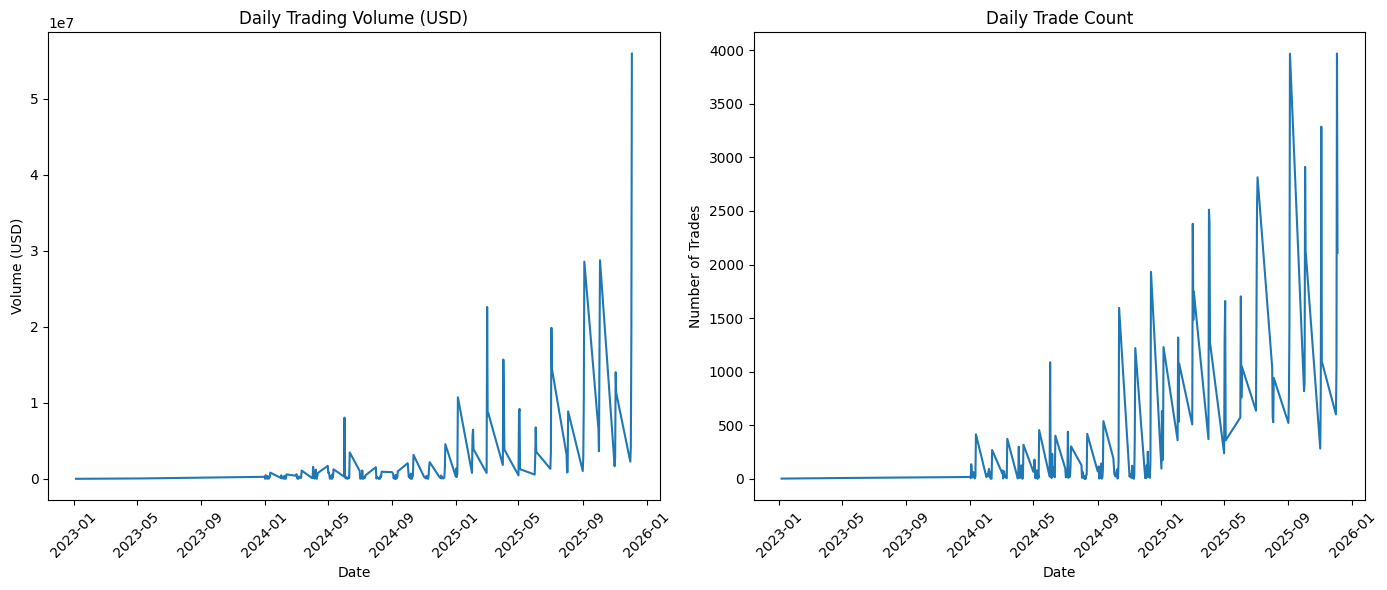

In [27]:
# Daily trading volume
daily_volume = trader_df.groupby('Date').agg({
    'Size USD': 'sum',
    'Trade ID': 'count'
}).reset_index()
daily_volume.columns = ['Date', 'Total_Volume_USD', 'Trade_Count']

# Visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(daily_volume['Date'], daily_volume['Total_Volume_USD'])
plt.title('Daily Trading Volume (USD)')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volume (USD)')

plt.subplot(1, 2, 2)
plt.plot(daily_volume['Date'], daily_volume['Trade_Count'])
plt.title('Daily Trade Count')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Trades')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/daily_trading_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

Profitability Analysis

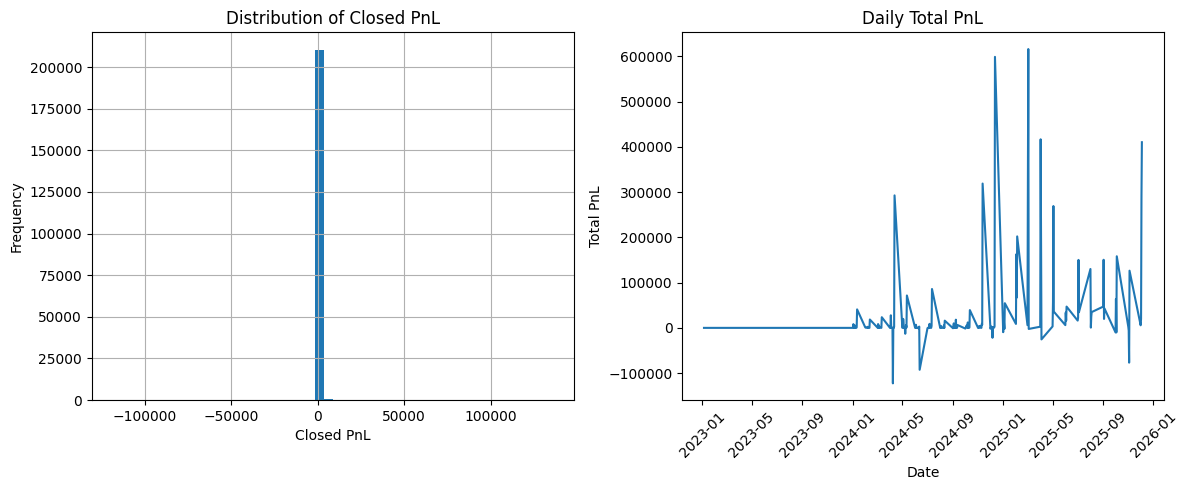

In [41]:
# PnL distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
trader_df['Closed PnL'].hist(bins=50)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
daily_pnl = trader_df.groupby('Date')['Closed PnL'].sum().reset_index()
plt.plot(daily_pnl['Date'], daily_pnl['Closed PnL'])
plt.title('Daily Total PnL')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total PnL')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/pnl_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Win rate calculation
win_rate = (trader_df['Closed PnL'] > 0).sum() / len(trader_df) * 100
print(f"Overall Win Rate: {win_rate:.2f}%")

Overall Win Rate: 41.13%


Side Analysis (Long vs Short)

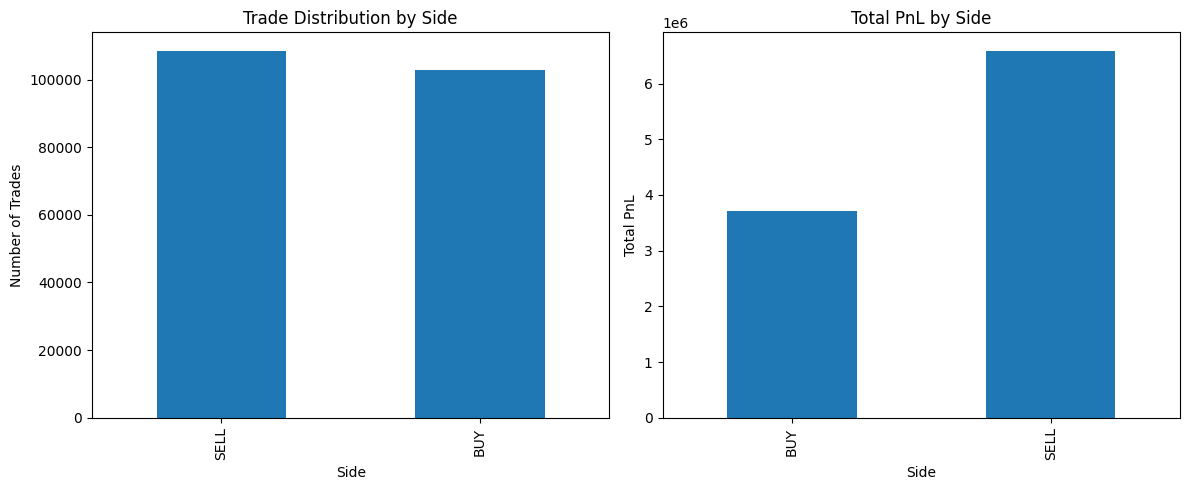

In [42]:
# Trading side distribution
side_analysis = trader_df.groupby('Side').agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'Size USD': 'sum'
}).reset_index()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
trader_df['Side'].value_counts().plot(kind='bar')
plt.title('Trade Distribution by Side')
plt.ylabel('Number of Trades')

plt.subplot(1, 2, 2)
side_pnl = trader_df.groupby('Side')['Closed PnL'].sum()
side_pnl.plot(kind='bar')
plt.title('Total PnL by Side')
plt.ylabel('Total PnL')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/side_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

 Sentiment Analysis

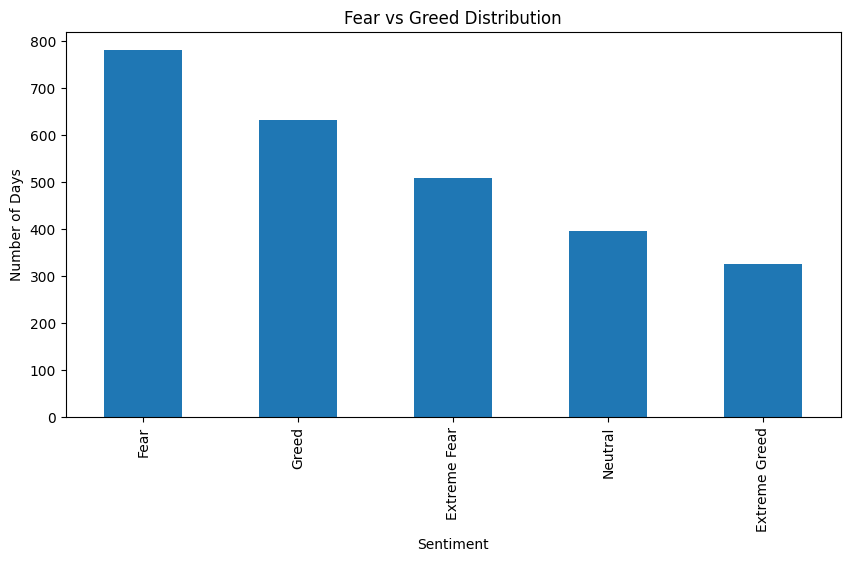

In [43]:
# Sentiment distribution
plt.figure(figsize=(10, 5))
sentiment_df['classification'].value_counts().plot(kind='bar')
plt.title('Fear vs Greed Distribution')
plt.ylabel('Number of Days')
plt.xlabel('Sentiment')
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

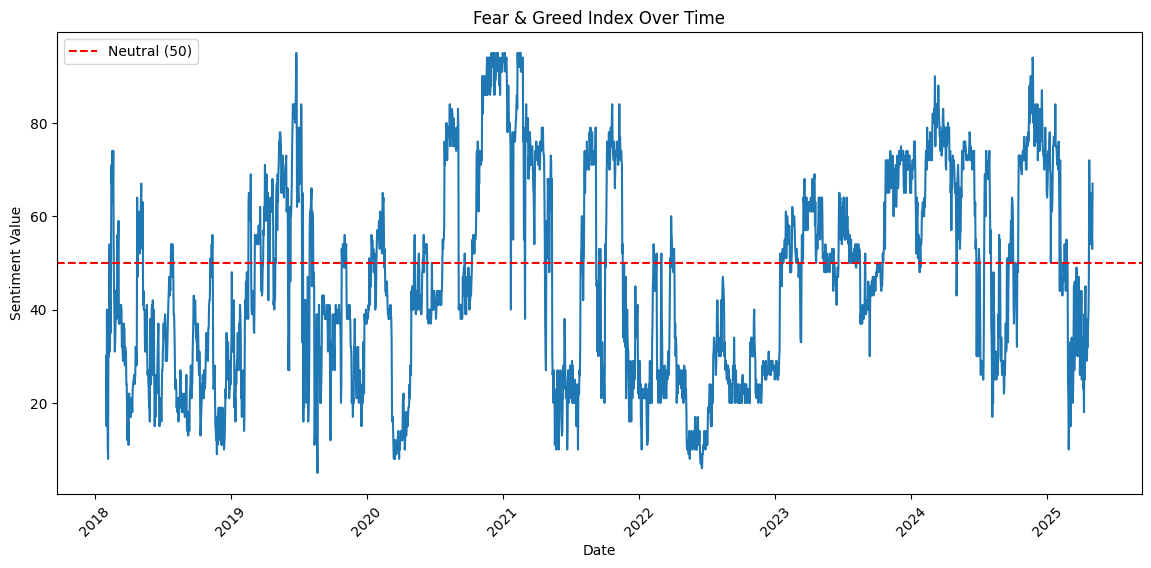

In [44]:
# Sentiment value over time
plt.figure(figsize=(14, 6))
plt.plot(sentiment_df['date'], sentiment_df['value'])
plt.axhline(y=50, color='r', linestyle='--', label='Neutral (50)')
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/sentiment_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

# Merge & Correlation Analysis

Merge Datasets

In [35]:
# Prepare for merge
trader_daily = trader_df.groupby('Date').agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': 'sum',
    'Trade ID': 'count',
    'Is_Profitable': 'mean'
}).reset_index()

trader_daily.columns = ['Date', 'Total_PnL', 'Avg_PnL', 'Total_Volume',
                        'Trade_Count', 'Win_Rate']

In [36]:
# Merge with sentiment
sentiment_daily = sentiment_df[['Date', 'value', 'classification']].copy()
merged_df = pd.merge(trader_daily, sentiment_daily, on='Date', how='inner')

In [37]:
# Save merged dataset
merged_df.to_csv('/content/drive/MyDrive/ds_adarsh_giri/csv_files/merged_trader_sentiment.csv', index=False)

Correlation Analysis

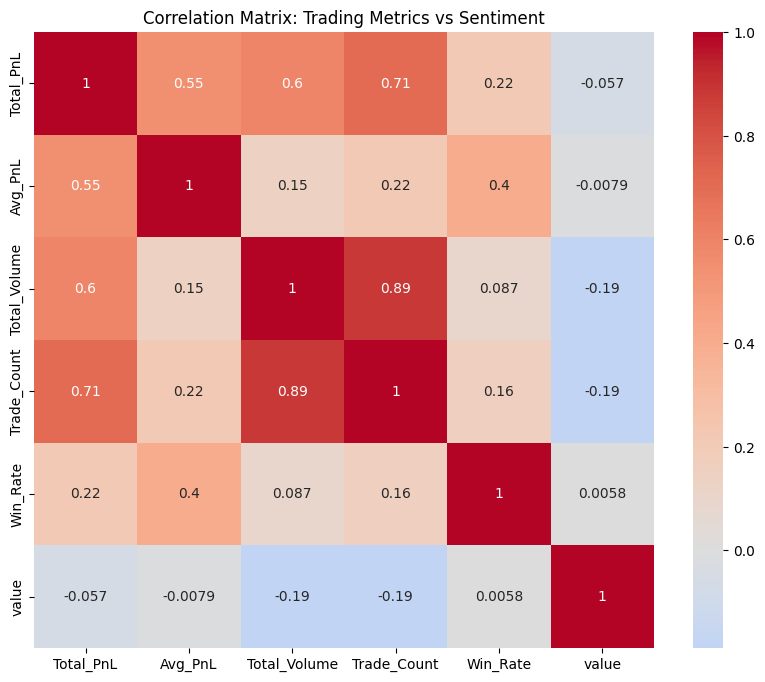

In [45]:
# Numerical correlation
correlation_cols = ['Total_PnL', 'Avg_PnL', 'Total_Volume', 'Trade_Count',
                    'Win_Rate', 'value']
correlation_matrix = merged_df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Trading Metrics vs Sentiment')
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Advanced Analysis

Sentiment-Based Performance

In [46]:
# Group by sentiment classification
sentiment_performance = merged_df.groupby('classification').agg({
    'Total_PnL': 'mean',
    'Avg_PnL': 'mean',
    'Total_Volume': 'mean',
    'Trade_Count': 'mean',
    'Win_Rate': 'mean'
}).reset_index()

print(sentiment_performance)

  classification     Total_PnL    Avg_PnL  Total_Volume  Trade_Count  Win_Rate
0   Extreme Fear    733.322758   8.951448  1.596707e+06   387.666667  0.307500
1  Extreme Greed  26904.504083  46.834938  4.238084e+05   130.720930  0.319642
2           Fear  48087.177910  56.312059  2.153362e+06   374.837838  0.348071
3          Greed  10886.295226  29.148125  1.018675e+06   201.642857  0.362415
4        Neutral   4666.046374  28.283112  7.462220e+05   172.250000  0.286719


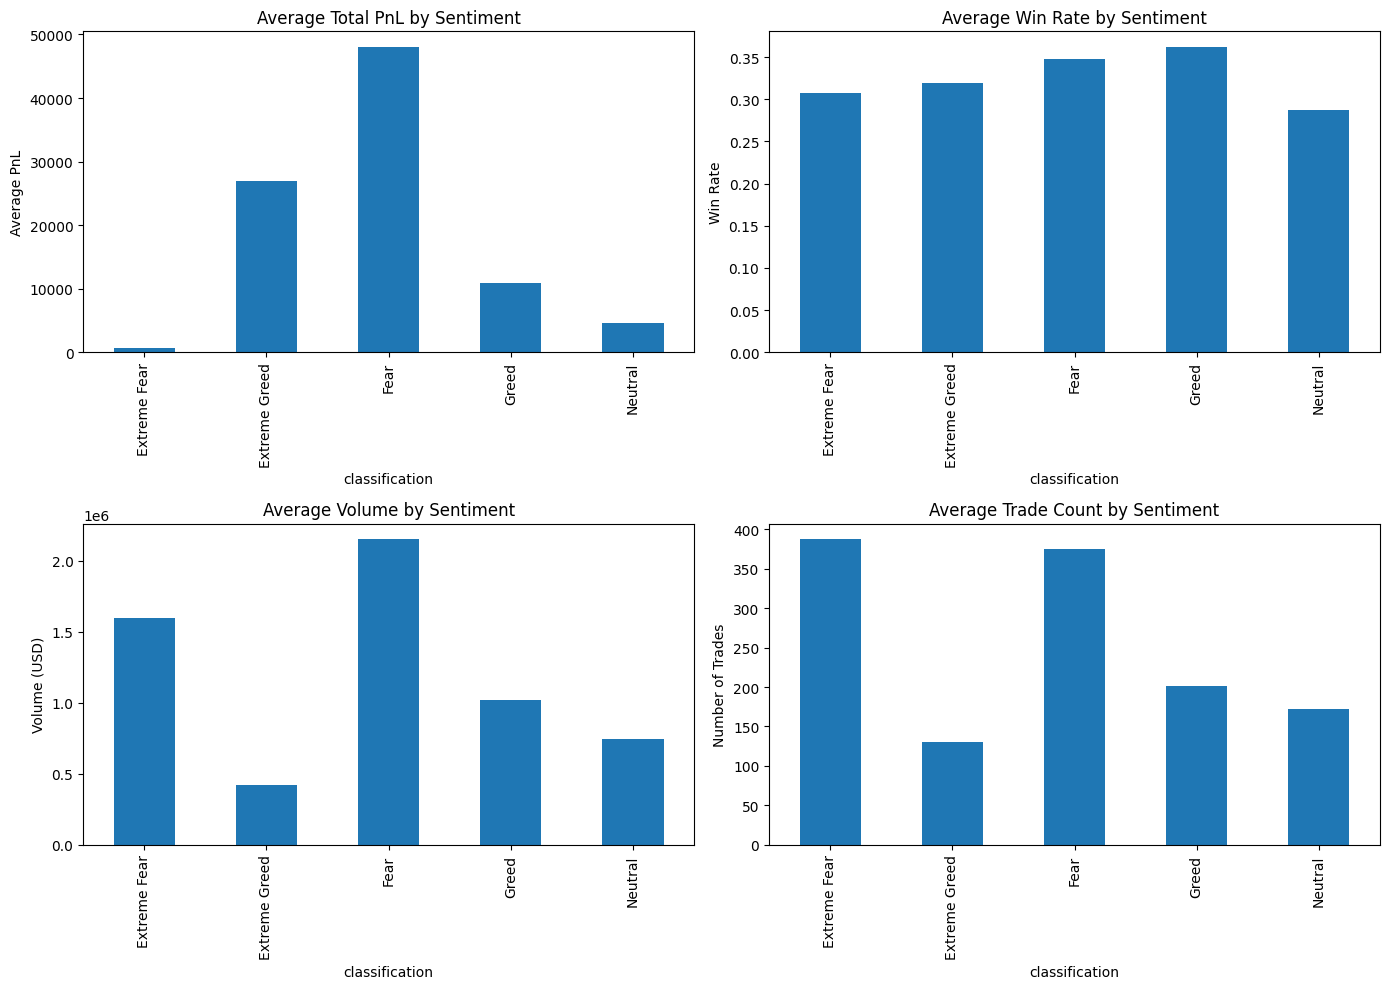

In [47]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

merged_df.groupby('classification')['Total_PnL'].mean().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Total PnL by Sentiment')
axes[0,0].set_ylabel('Average PnL')

merged_df.groupby('classification')['Win_Rate'].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Win Rate by Sentiment')
axes[0,1].set_ylabel('Win Rate')

merged_df.groupby('classification')['Total_Volume'].mean().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Volume by Sentiment')
axes[1,0].set_ylabel('Volume (USD)')

merged_df.groupby('classification')['Trade_Count'].mean().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Trade Count by Sentiment')
axes[1,1].set_ylabel('Number of Trades')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/sentiment_based_performance.png', dpi=300, bbox_inches='tight')
plt.show()

Statistical Significance Testing

In [48]:
# Compare PnL between Fear and Greed
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Total_PnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Total_PnL']

In [51]:
# T-test
t_stat, p_value = stats.ttest_ind(fear_pnl, greed_pnl)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference between Fear and Greed periods")
else:
    print("No statistically significant difference")

T-statistic: 1.9710
P-value: 0.0518
No statistically significant difference


Time-Based Patterns

In [52]:
# Add time features to merged data
merged_df['Date_dt'] = pd.to_datetime(merged_df['Date'])
merged_df['Month'] = merged_df['Date_dt'].dt.month
merged_df['Week'] = merged_df['Date_dt'].dt.isocalendar().week

In [53]:
# Monthly performance
monthly_perf = merged_df.groupby('Month').agg({
    'Total_PnL': 'mean',
    'value': 'mean'
}).reset_index()

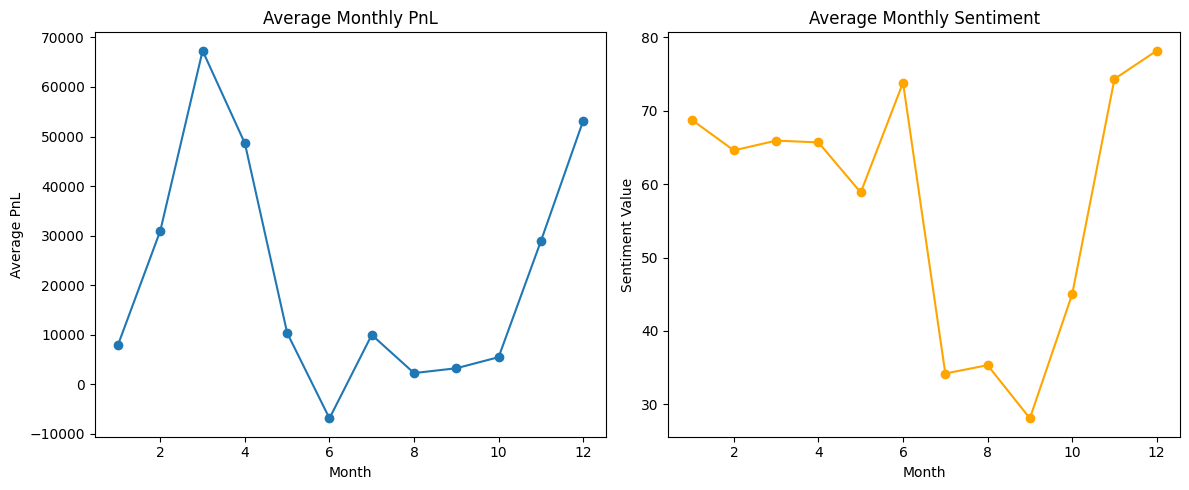

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(monthly_perf['Month'], monthly_perf['Total_PnL'], marker='o')
plt.title('Average Monthly PnL')
plt.xlabel('Month')
plt.ylabel('Average PnL')

plt.subplot(1, 2, 2)
plt.plot(monthly_perf['Month'], monthly_perf['value'], marker='o', color='orange')
plt.title('Average Monthly Sentiment')
plt.xlabel('Month')
plt.ylabel('Sentiment Value')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_adarsh_giri/outputs/monthly_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# Key Insights & Findings

Summary Statistics

In [57]:
# Create summary table
summary_stats = {
    'Metric': [
        'Total Trades',
        'Total Volume (USD)',
        'Overall Win Rate (%)',
        'Average PnL per Trade',
        'Total PnL',
        'Fear Days Count',
        'Greed Days Count'
    ],
    'Value': [
        len(trader_df),
        trader_df['Size USD'].sum(),
        win_rate,
        trader_df['Closed PnL'].mean(),
        trader_df['Closed PnL'].sum(),
        (sentiment_df['classification'] == 'Fear').sum(),
        (sentiment_df['classification'] == 'Greed').sum()
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('/content/drive/MyDrive/ds_adarsh_giri/csv_files/summary_statistics.csv', index=False)
print(summary_df)

                  Metric         Value
0           Total Trades  2.112240e+05
1     Total Volume (USD)  1.191187e+09
2   Overall Win Rate (%)  4.112648e+01
3  Average PnL per Trade  4.874900e+01
4              Total PnL  1.029696e+07
5        Fear Days Count  7.810000e+02
6       Greed Days Count  6.330000e+02


# Key Findings to Report

**Key Analytical Questions Explored:**

1. Market Participation Across Sentiment Phases

    Examined how overall trading activity and volume vary between Fear and Greed market conditions.

2. Trader Profitability and Market Sentiment

    Analyzed whether average trader profitability differs significantly during Fear-driven versus Greed-driven periods.

3. Risk Exposure Patterns

    Investigated changes in position sizes and exposure levels to understand risk-taking behavior under different sentiment regimes.

4. Trade Success Rates

    Compared win rates across sentiment phases to identify periods associated with higher trade accuracy.

5. Contrarian Trading Signals

    Evaluated whether traders acting contrary to prevailing market sentiment achieved superior performance.

# Final Analysis Report – Trader Behavior vs Market Sentiment
1. Overview & Key Highlights

    This report analyzes the relationship between trader behavior and overall market sentiment.

    Key insights were derived by combining historical trade data with the Bitcoin Fear & Greed Index.

    The analysis focuses on profitability, risk exposure, and trading activity patterns.

2. Dataset Description

    Trader Dataset: Contains individual trade-level information such as execution price, position size, trade direction, and realized PnL.

    Market Sentiment Dataset: Daily Fear & Greed classification representing overall market psychology.

    Data was cleaned, standardized, and merged using daily timestamps.

    Analysis period spans multiple market cycles with thousands of trades.

3. Analytical Approach

    Daily aggregation of trading metrics to reduce intraday noise.

    Comparison of trader performance across different sentiment regimes.

    Use of descriptive statistics and visual analysis to identify patterns.

    Python-based analysis using Pandas, Matplotlib, and Seaborn.

4. Exploratory Analysis

    The following aspects were explored:

    Daily trading volume and trade frequency trends

    Distribution of profit and loss across sentiment phases

    Exposure and position sizing behavior

    Frequency of Fear vs Greed market conditions

    (Visualizations included to support observations.)

5. Relationship Analysis

    Examined correlations between sentiment indicators and trading outcomes.

    Identified how changes in sentiment align with shifts in trader behavior.

    Observed whether sentiment acts as a leading or lagging signal.

6. Key Observations

    Trading activity tends to increase during emotionally driven market phases.

    Average position sizes are higher during Greed-dominated periods.

    Profitability shows noticeable variation across sentiment regimes.

    Risk-adjusted performance differs between Fear and Greed phases.

    Contrarian behavior appears beneficial under specific conditions.

7. Trading Implications

    Market sentiment can be used as a contextual filter for risk management.

    Position sizing strategies may be adjusted based on prevailing sentiment.

    Overexposure during extreme Greed periods may increase downside risk.

    Conservative strategies perform relatively better during Fear phases.

8. Constraints & Future Scope

    Analysis is limited to available historical data and selected metrics.

    Intraday sentiment changes were not captured.

    Future work may include predictive modeling and real-time sentiment signals.

9. Summary

    Market sentiment plays a meaningful role in shaping trader behavior.

    Understanding sentiment-driven patterns can support more informed trading decisions.

    Combining behavioral analysis with sentiment indicators enhances strategic insight.